In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
#'loan_2015_new.csv': common features and issued&loanstatus

#'loan_2015_clean.csv': common features and issued&loanstatus, no duplicate features,no all_null features

#'loan_2015_clean_update.csv': common features and loanstatus, no duplicate features,no all_null
# features, loanstatus=1 or 0

## Request Current  Data from Lending Club

In [2]:
api_key =open('api_key.txt','r').read()
api_key

'no1RppkDqPEDLPJrx0Y89AflPkk='

In [3]:
api_key = open('api_key.txt','r').read()
headers = {'Authorization':api_key}
url = 'https://api.lendingclub.com/api/investor/v1/loans/listing'
r = requests.get(url, headers = headers)

In [4]:
r.json()

{'asOfDate': '2019-09-03T17:11:14.383-07:00',
 'loans': [{'id': 157562906,
   'memberId': 195987090,
   'loanAmount': 6000.0,
   'fundedAmount': 3500.0,
   'term': 36,
   'intRate': 11.02,
   'expDefaultRate': 5.36,
   'serviceFeeRate': 1.05,
   'installment': 196.49,
   'grade': 'B',
   'subGrade': 'B2',
   'empLength': 36,
   'homeOwnership': 'RENT',
   'annualInc': 34000.0,
   'isIncV': 'VERIFIED',
   'acceptD': '2019-08-23T00:40:53.000-07:00',
   'expD': '2019-10-03T14:00:00.000-07:00',
   'listD': '2019-09-03T14:00:00.000-07:00',
   'creditPullD': '2019-08-23T00:38:12.000-07:00',
   'reviewStatusD': '2019-09-03T09:54:16.000-07:00',
   'reviewStatus': 'APPROVED',
   'desc': None,
   'purpose': 'debt_consolidation',
   'addrZip': '750xx',
   'addrState': 'TX',
   'investorCount': None,
   'ilsExpD': '2019-09-03T14:00:00.000-07:00',
   'initialListStatus': 'F',
   'empTitle': 'Security',
   'accNowDelinq': 0,
   'accOpenPast24Mths': 11,
   'bcOpenToBuy': 32098,
   'percentBcGt75': 0.

In [5]:
data = r.json()
myData = data['loans']

In [6]:
myData

[{'id': 157562906,
  'memberId': 195987090,
  'loanAmount': 6000.0,
  'fundedAmount': 3500.0,
  'term': 36,
  'intRate': 11.02,
  'expDefaultRate': 5.36,
  'serviceFeeRate': 1.05,
  'installment': 196.49,
  'grade': 'B',
  'subGrade': 'B2',
  'empLength': 36,
  'homeOwnership': 'RENT',
  'annualInc': 34000.0,
  'isIncV': 'VERIFIED',
  'acceptD': '2019-08-23T00:40:53.000-07:00',
  'expD': '2019-10-03T14:00:00.000-07:00',
  'listD': '2019-09-03T14:00:00.000-07:00',
  'creditPullD': '2019-08-23T00:38:12.000-07:00',
  'reviewStatusD': '2019-09-03T09:54:16.000-07:00',
  'reviewStatus': 'APPROVED',
  'desc': None,
  'purpose': 'debt_consolidation',
  'addrZip': '750xx',
  'addrState': 'TX',
  'investorCount': None,
  'ilsExpD': '2019-09-03T14:00:00.000-07:00',
  'initialListStatus': 'F',
  'empTitle': 'Security',
  'accNowDelinq': 0,
  'accOpenPast24Mths': 11,
  'bcOpenToBuy': 32098,
  'percentBcGt75': 0.0,
  'bcUtil': 16.0,
  'dti': 2.65,
  'delinq2Yrs': 0,
  'delinqAmnt': 0.0,
  'earliestC

In [7]:
len(myData)

6

## Loading Data

In [8]:
with open('current_list.txt', 'w') as outfile:
    json.dump(myData, outfile)

In [9]:
df_current = pd.read_json('current_list.txt')
df_current.head()

,accNowDelinq,accOpenPast24Mths,acceptD,addrState,addrZip,allUtil,annualInc,annualIncJoint,applicationType,avgCurBal,...,totCollAmt,totCurBal,totHiCredLim,totalAcc,totalBalExMort,totalBalIl,totalBcLimit,totalCuTl,totalIlHighCreditLimit,totalRevHiLim
0,0,11,2019-08-23T00:40:53.000-07:00,TX,750xx,15.9,34000,NaN,INDIVIDUAL,12115,...,0,121150,153649,22,6102,0,38200,0,0,38200
1,0,8,2019-08-30T14:41:03.000-07:00,CO,805xx,70.6,80000,NaN,INDIVIDUAL,4832,...,815,43492,61582,26,43492,34779,23300,3,35982,25600
2,0,4,2019-09-03T09:44:48.000-07:00,CA,932xx,96.5,65000,NaN,INDIVIDUAL,6695,...,0,140591,145671,58,140591,137960,35600,1,110071,35600
3,0,3,2019-09-03T10:00:36.000-07:00,OH,441xx,67.1,77000,NaN,INDIVIDUAL,19179,...,0,249333,282300,42,69870,48415,23200,0,54115,34100
4,0,3,2019-09-03T09:12:29.000-07:00,TX,788xx,31.7,0,70000.0,JOINT,1786,...,0,21428,93050,19,21428,12637,5600,1,60750,32300


In [10]:
len(df_current)

6

In [11]:
myData

[{'id': 157562906,
  'memberId': 195987090,
  'loanAmount': 6000.0,
  'fundedAmount': 3500.0,
  'term': 36,
  'intRate': 11.02,
  'expDefaultRate': 5.36,
  'serviceFeeRate': 1.05,
  'installment': 196.49,
  'grade': 'B',
  'subGrade': 'B2',
  'empLength': 36,
  'homeOwnership': 'RENT',
  'annualInc': 34000.0,
  'isIncV': 'VERIFIED',
  'acceptD': '2019-08-23T00:40:53.000-07:00',
  'expD': '2019-10-03T14:00:00.000-07:00',
  'listD': '2019-09-03T14:00:00.000-07:00',
  'creditPullD': '2019-08-23T00:38:12.000-07:00',
  'reviewStatusD': '2019-09-03T09:54:16.000-07:00',
  'reviewStatus': 'APPROVED',
  'desc': None,
  'purpose': 'debt_consolidation',
  'addrZip': '750xx',
  'addrState': 'TX',
  'investorCount': None,
  'ilsExpD': '2019-09-03T14:00:00.000-07:00',
  'initialListStatus': 'F',
  'empTitle': 'Security',
  'accNowDelinq': 0,
  'accOpenPast24Mths': 11,
  'bcOpenToBuy': 32098,
  'percentBcGt75': 0.0,
  'bcUtil': 16.0,
  'dti': 2.65,
  'delinq2Yrs': 0,
  'delinqAmnt': 0.0,
  'earliestC

In [12]:
df_current = pd.io.json.json_normalize(myData)

In [13]:
df_current.head()

,accNowDelinq,accOpenPast24Mths,acceptD,addrState,addrZip,allUtil,annualInc,annualIncJoint,applicationType,avgCurBal,...,totCollAmt,totCurBal,totHiCredLim,totalAcc,totalBalExMort,totalBalIl,totalBcLimit,totalCuTl,totalIlHighCreditLimit,totalRevHiLim
0,0,11,2019-08-23T00:40:53.000-07:00,TX,750xx,15.9,34000.0,NaN,INDIVIDUAL,12115,...,0,121150,153649,22,6102,0.0,38200,0,0,38200
1,0,8,2019-08-30T14:41:03.000-07:00,CO,805xx,70.6,80000.0,NaN,INDIVIDUAL,4832,...,815,43492,61582,26,43492,34779.0,23300,3,35982,25600
2,0,4,2019-09-03T09:44:48.000-07:00,CA,932xx,96.5,65000.0,NaN,INDIVIDUAL,6695,...,0,140591,145671,58,140591,137960.0,35600,1,110071,35600
3,0,3,2019-09-03T10:00:36.000-07:00,OH,441xx,67.1,77000.0,NaN,INDIVIDUAL,19179,...,0,249333,282300,42,69870,48415.0,23200,0,54115,34100
4,0,3,2019-09-03T09:12:29.000-07:00,TX,788xx,31.7,0.0,70000.0,JOINT,1786,...,0,21428,93050,19,21428,12637.0,5600,1,60750,32300


In [14]:
df_2015 = pd.read_csv('Loan_2015.csv', skiprows=1)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df_2015.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [16]:
df_current.columns.values

array(['accNowDelinq', 'accOpenPast24Mths', 'acceptD', 'addrState',
       'addrZip', 'allUtil', 'annualInc', 'annualIncJoint',
       'applicationType', 'avgCurBal', 'bcOpenToBuy', 'bcUtil',
       'chargeoffWithin12Mths', 'collections12MthsExMed', 'creditPullD',
       'delinq2Yrs', 'delinqAmnt', 'desc', 'disbursementMethod', 'dti',
       'dtiJoint', 'earliestCrLine', 'empLength', 'empTitle', 'expD',
       'expDefaultRate', 'ficoRangeHigh', 'ficoRangeLow', 'fundedAmount',
       'grade', 'homeOwnership', 'housingPayment', 'iLUtil', 'id',
       'ilsExpD', 'initialListStatus', 'inqFi', 'inqLast12m',
       'inqLast6Mths', 'installment', 'intRate', 'investorCount',
       'isIncV', 'isIncVJoint', 'listD', 'loanAmount', 'maxBalBc',
       'memberId', 'moSinOldIlAcct', 'moSinOldRevTlOp',
       'moSinRcntRevTlOp', 'moSinRcntTl', 'mortAcc', 'mtgPayment',
       'mthsSinceLastDelinq', 'mthsSinceLastMajorDerog',
       'mthsSinceLastRecord', 'mthsSinceRcntIl', 'mthsSinceRecentBc',
       

In [17]:
len(df_current.columns.values)

119

## Unify Feature Name Format 

In [18]:
current_features = list(df_current.columns.values)
current_features

['accNowDelinq',
 'accOpenPast24Mths',
 'acceptD',
 'addrState',
 'addrZip',
 'allUtil',
 'annualInc',
 'annualIncJoint',
 'applicationType',
 'avgCurBal',
 'bcOpenToBuy',
 'bcUtil',
 'chargeoffWithin12Mths',
 'collections12MthsExMed',
 'creditPullD',
 'delinq2Yrs',
 'delinqAmnt',
 'desc',
 'disbursementMethod',
 'dti',
 'dtiJoint',
 'earliestCrLine',
 'empLength',
 'empTitle',
 'expD',
 'expDefaultRate',
 'ficoRangeHigh',
 'ficoRangeLow',
 'fundedAmount',
 'grade',
 'homeOwnership',
 'housingPayment',
 'iLUtil',
 'id',
 'ilsExpD',
 'initialListStatus',
 'inqFi',
 'inqLast12m',
 'inqLast6Mths',
 'installment',
 'intRate',
 'investorCount',
 'isIncV',
 'isIncVJoint',
 'listD',
 'loanAmount',
 'maxBalBc',
 'memberId',
 'moSinOldIlAcct',
 'moSinOldRevTlOp',
 'moSinRcntRevTlOp',
 'moSinRcntTl',
 'mortAcc',
 'mtgPayment',
 'mthsSinceLastDelinq',
 'mthsSinceLastMajorDerog',
 'mthsSinceLastRecord',
 'mthsSinceRcntIl',
 'mthsSinceRecentBc',
 'mthsSinceRecentBcDlq',
 'mthsSinceRecentInq',
 'mth

In [19]:
for i in range(len(current_features)):
    current_features[i] = current_features[i].lower()
current_features[:5]

['accnowdelinq', 'accopenpast24mths', 'acceptd', 'addrstate', 'addrzip']

In [20]:
his_features = list(df_2015.columns.values)
his_features

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [21]:
for i in range(len(his_features)):
    his_features[i] = his_features[i].replace('_', '')
his_features[:5]

['id', 'memberid', 'loanamnt', 'fundedamnt', 'fundedamntinv']

In [22]:
common_features = set(current_features) & set(his_features)
print(len(common_features))
print(common_features)

100
{'totalilhighcreditlimit', 'secappchargeoffwithin12mths', 'pubrecbankruptcies', 'mthssincerecentinq', 'numrevaccts', 'intrate', 'memberid', 'openacc', 'mthssincerecentbcdlq', 'pcttlnvrdlq', 'accopenpast24mths', 'annualincjoint', 'subgrade', 'openrv12m', 'accnowdelinq', 'totalbalil', 'avgcurbal', 'delinq2yrs', 'dtijoint', 'numoprevtl', 'secappficorangehigh', 'annualinc', 'numrevtlbalgt0', 'openil12m', 'mosinrcntrevtlop', 'totalrevhilim', 'openactil', 'totalbclimit', 'revolbaljoint', 'totalacc', 'mthssincelastrecord', 'ficorangehigh', 'numtl90gdpd24m', 'numsats', 'secappficorangelow', 'applicationtype', 'totalbalexmort', 'chargeoffwithin12mths', 'totalcutl', 'grade', 'earliestcrline', 'mosinoldrevtlop', 'bcutil', 'inqlast6mths', 'pubrec', 'emptitle', 'secappearliestcrline', 'tothicredlim', 'totcurbal', 'initialliststatus', 'numbcsats', 'ilutil', 'bcopentobuy', 'allutil', 'numtl120dpd2m', 'mthssincerecentbc', 'id', 'inqlast12m', 'emplength', 'mortacc', 'numtl30dpd', 'secappinqlast6mth

In [23]:
his_unique = set(his_features) - set(current_features)
current_unique = set(current_features) - set(his_features)
print('his_unique features:', len(his_unique), '\n', his_unique, '\n')
print('current_unique features:', len(current_unique), '\n', current_unique)

his_unique features: 50 
 {'verificationstatusjoint', 'fundedamnt', 'outprncp', 'hardshiplength', 'lastpymntamnt', 'title', 'collectionrecoveryfee', 'verificationstatus', 'settlementterm', 'url', 'totalpymnt', 'totalrecint', 'lastcreditpulld', 'hardshiptype', 'hardshipdpd', 'hardshiploanstatus', 'settlementstatus', 'deferralterm', 'totalpymntinv', 'lastpymntd', 'policycode', 'loanamnt', 'paymentplanstartdate', 'hardshipstatus', 'debtsettlementflagdate', 'nextpymntd', 'outprncpinv', 'lastficorangelow', 'settlementpercentage', 'origprojectedadditionalaccruedinterest', 'hardshipflag', 'loanstatus', 'hardshipamount', 'hardshippayoffbalanceamount', 'settlementdate', 'numacctsever120pd', 'pymntplan', 'zipcode', 'settlementamount', 'debtsettlementflag', 'hardshipenddate', 'totalrecprncp', 'recoveries', 'fundedamntinv', 'totalreclatefee', 'hardshiplastpaymentamount', 'issued', 'hardshipstartdate', 'hardshipreason', 'lastficorangehigh'} 

current_unique features: 19 
 {'acceptd', 'loanamount', 

In [24]:
common_features = common_features.union({'verificationstatus',
                       'verificationstatusjoint',
                       'zipcode',
                       'fundedamnt',
                       'numacctsever120pd',
                       'loanamnt'})
len(common_features)

106

### Convert column names and save into new dataframe with common features and issued,  loanstatus

In [25]:
for col in df_2015.columns.values:
    df_2015.rename(columns={str(col): str(col).replace('_', '')}, inplace=True)
df_2015.columns.values

array(['id', 'memberid', 'loanamnt', 'fundedamnt', 'fundedamntinv',
       'term', 'intrate', 'installment', 'grade', 'subgrade', 'emptitle',
       'emplength', 'homeownership', 'annualinc', 'verificationstatus',
       'issued', 'loanstatus', 'pymntplan', 'url', 'desc', 'purpose',
       'title', 'zipcode', 'addrstate', 'dti', 'delinq2yrs',
       'earliestcrline', 'ficorangelow', 'ficorangehigh', 'inqlast6mths',
       'mthssincelastdelinq', 'mthssincelastrecord', 'openacc', 'pubrec',
       'revolbal', 'revolutil', 'totalacc', 'initialliststatus',
       'outprncp', 'outprncpinv', 'totalpymnt', 'totalpymntinv',
       'totalrecprncp', 'totalrecint', 'totalreclatefee', 'recoveries',
       'collectionrecoveryfee', 'lastpymntd', 'lastpymntamnt',
       'nextpymntd', 'lastcreditpulld', 'lastficorangehigh',
       'lastficorangelow', 'collections12mthsexmed',
       'mthssincelastmajorderog', 'policycode', 'applicationtype',
       'annualincjoint', 'dtijoint', 'verificationstatusjoint

In [26]:
df_2015.head()

,id,memberid,loanamnt,fundedamnt,fundedamntinv,term,intrate,installment,grade,subgrade,...,origprojectedadditionalaccruedinterest,hardshippayoffbalanceamount,hardshiplastpaymentamount,debtsettlementflag,debtsettlementflagdate,settlementstatus,settlementdate,settlementamount,settlementpercentage,settlementterm
0,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99%,820.28,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85%,829.90,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99%,123.03,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45%,289.91,F,F1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78%,432.66,B,B4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_2015_1 = df_2015[list(common_features)+['issued','loanstatus']]
df_2015_1.shape

(421097, 108)

In [28]:
df_2015_1.to_csv('loan_2015_new.csv', index=False)

In [29]:
df = pd.read_csv('loan_2015_new.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,5,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
df.shape

(421097, 108)

In [31]:
import os
print(os.path.abspath('loan_2015_new.csv'))

/Users/hayley/Desktop/DS 4 projects/Fintech/FinTech_data/loan_2015_new.csv


## Current features, listD & acceptD

In [32]:
df_current.columns

Index(['accNowDelinq', 'accOpenPast24Mths', 'acceptD', 'addrState', 'addrZip',
       'allUtil', 'annualInc', 'annualIncJoint', 'applicationType',
       'avgCurBal',
       ...
       'totCollAmt', 'totCurBal', 'totHiCredLim', 'totalAcc', 'totalBalExMort',
       'totalBalIl', 'totalBcLimit', 'totalCuTl', 'totalIlHighCreditLimit',
       'totalRevHiLim'],
      dtype='object', length=119)

In [33]:
df_current[['acceptD', 'listD']][:5]

,acceptD,listD
0,2019-08-23T00:40:53.000-07:00,2019-09-03T14:00:00.000-07:00
1,2019-08-30T14:41:03.000-07:00,2019-09-03T14:00:00.000-07:00
2,2019-09-03T09:44:48.000-07:00,2019-09-03T14:00:00.000-07:00
3,2019-09-03T10:00:36.000-07:00,2019-09-03T14:00:00.000-07:00
4,2019-09-03T09:12:29.000-07:00,2019-09-03T14:00:00.000-07:00


## 2. Lending Club EDA on df_2015_new 

In [34]:
df = pd.read_csv('loan_2015_new.csv')
df.shape

(421097, 108)

In [35]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Data columns (total 108 columns):
totalilhighcreditlimit           421095 non-null float64
allutil                          21372 non-null float64
numtl120dpd2m                    401865 non-null float64
verificationstatusjoint          511 non-null object
mthssincerecentbc                417297 non-null float64
id                               421097 non-null object
inqlast12m                       21372 non-null float64
emplength                        397278 non-null object
secappchargeoffwithin12mths      0 non-null float64
mortacc                          421095 non-null float64
numtl30dpd                       421095 non-null float64
secappinqlast6mths               0 non-null float64
secappnumrevaccts                0 non-null float64
openacc6m                        21372 non-null float64
pubrecbankruptcies               421095 non-null float64
mthssincerecentinq               376496 non-null float64


In [36]:
####  There are float64(88), object(20), and 14 of them are all_null feature

## Classify features into all_null_feature, float_feature, object_feature 

In [37]:
#cols_0: before remove duplicated columns 
cols_0 = df.columns.values
print(len(cols_0))
print(cols_0)

108
['totalilhighcreditlimit' 'allutil' 'numtl120dpd2m'
 'verificationstatusjoint' 'mthssincerecentbc' 'id' 'inqlast12m'
 'emplength' 'secappchargeoffwithin12mths' 'mortacc' 'numtl30dpd'
 'secappinqlast6mths' 'secappnumrevaccts' 'openacc6m' 'pubrecbankruptcies'
 'mthssincerecentinq' 'numrevaccts' 'numactvrevtl' 'dti'
 'mthssincelastdelinq' 'intrate' 'memberid' 'mthssincelastmajorderog'
 'openacc' 'delinqamnt' 'mthssincerecentbcdlq' 'pcttlnvrdlq'
 'accopenpast24mths' 'annualincjoint' 'homeownership' 'loanamnt'
 'subgrade' 'mosinrcnttl' 'openrv12m' 'accnowdelinq' 'totalbalil'
 'mthssincercntil' 'collections12mthsexmed' 'avgcurbal' 'desc'
 'secappmortacc' 'secapprevolutil' 'delinq2yrs' 'dtijoint' 'numoprevtl'
 'secappficorangehigh' 'annualinc' 'numrevtlbalgt0' 'mosinoldilacct'
 'openil12m' 'mosinrcntrevtlop' 'taxliens' 'totalrevhilim' 'openactil'
 'numacctsever120pd' 'percentbcgt75' 'totalbclimit' 'maxbalbc' 'openrv24m'
 'revolbaljoint' 'secappmthssincelastmajorderog' 'totalacc'
 'mthssin

In [38]:
len(cols_0)

108

In [39]:
df[['fundedamnt','loanamnt']].dtypes

fundedamnt    float64
loanamnt      float64
dtype: object

In [40]:
a=pd.DataFrame({'a':[1,2,3,4],
                'b':[6,7,8,9],
                'c':[6,6,6,6],
                'd':[1,2,3,4],
                'e':['a','b','c','d'],
                'f':[1.0,2.2,3.1,4.5],
                'g':[1.0,2.2,3.1,4.5]})
a

,a,b,c,d,e,f,g
0,1,6,6,1,a,1.0,1.0
1,2,7,6,2,b,2.2,2.2
2,3,8,6,3,c,3.1,3.1
3,4,9,6,4,d,4.5,4.5


In [41]:
a.dtypes

a      int64
b      int64
c      int64
d      int64
e     object
f    float64
g    float64
dtype: object

In [42]:
b =a.T.drop_duplicates().T
b

,a,b,c,e,f
0,1,6,6,a,1
1,2,7,6,b,2.2
2,3,8,6,c,3.1
3,4,9,6,d,4.5


In [43]:
b.dtypes

a    object
b    object
c    object
e    object
f    object
dtype: object

In [44]:
b.f=b.f.astype('float64')
b.a=b.a.astype('int64')
b.b=b.b.astype('int64')
b.c=b.c.astype('int64')
b.dtypes

a      int64
b      int64
c      int64
e     object
f    float64
dtype: object

In [45]:
b

,a,b,c,e,f
0,1,6,6,a,1.0
1,2,7,6,b,2.2
2,3,8,6,c,3.1
3,4,9,6,d,4.5


#####  There are float64(88), object(20), and 14 of them are all_null feature 

### Classify features into all_null_feature, float_feature, object_feature 

In [46]:
all_null_feature = []
num_feature = []
ob_feature = []
for col in cols_0:
    if df[col].isnull().sum() == df.shape[0]:
        all_null_feature.append(col)
    if df[col].dtype == 'object':
        ob_feature.append(col)
    else:
        num_feature.append(col)

print('all_null_feature:', len(all_null_feature), '\n', all_null_feature, '\n')
print('ob_feature:', len(ob_feature), '\n', ob_feature, '\n')
print('num_feature:', len(num_feature), '\n', num_feature)

all_null_feature: 14 
 ['secappchargeoffwithin12mths', 'secappinqlast6mths', 'secappnumrevaccts', 'memberid', 'secappmortacc', 'secapprevolutil', 'secappficorangehigh', 'revolbaljoint', 'secappmthssincelastmajorderog', 'secappopenacc', 'secappficorangelow', 'secappcollections12mthsexmed', 'secappopenactil', 'secappearliestcrline'] 

ob_feature: 20 
 ['verificationstatusjoint', 'id', 'emplength', 'intrate', 'homeownership', 'subgrade', 'desc', 'applicationtype', 'verificationstatus', 'purpose', 'grade', 'earliestcrline', 'revolutil', 'addrstate', 'term', 'emptitle', 'initialliststatus', 'zipcode', 'issued', 'loanstatus'] 

num_feature: 88 
 ['totalilhighcreditlimit', 'allutil', 'numtl120dpd2m', 'mthssincerecentbc', 'inqlast12m', 'secappchargeoffwithin12mths', 'mortacc', 'numtl30dpd', 'secappinqlast6mths', 'secappnumrevaccts', 'openacc6m', 'pubrecbankruptcies', 'mthssincerecentinq', 'numrevaccts', 'numactvrevtl', 'dti', 'mthssincelastdelinq', 'memberid', 'mthssincelastmajorderog', 'opena

In [47]:
# Drop dupllicate columns： df.T.drop_duplicates().T（inplace=True）
##However .T would convert all the data types into object
df_temp = df.T.drop_duplicates().T
cols = df_temp.columns.values
print(len(cols))
print(cols)

94
['totalilhighcreditlimit' 'allutil' 'numtl120dpd2m'
 'verificationstatusjoint' 'mthssincerecentbc' 'id' 'inqlast12m'
 'emplength' 'secappchargeoffwithin12mths' 'mortacc' 'numtl30dpd'
 'openacc6m' 'pubrecbankruptcies' 'mthssincerecentinq' 'numrevaccts'
 'numactvrevtl' 'dti' 'mthssincelastdelinq' 'intrate'
 'mthssincelastmajorderog' 'openacc' 'delinqamnt' 'mthssincerecentbcdlq'
 'pcttlnvrdlq' 'accopenpast24mths' 'annualincjoint' 'homeownership'
 'loanamnt' 'subgrade' 'mosinrcnttl' 'openrv12m' 'accnowdelinq'
 'totalbalil' 'mthssincercntil' 'collections12mthsexmed' 'avgcurbal'
 'desc' 'delinq2yrs' 'dtijoint' 'numoprevtl' 'annualinc' 'numrevtlbalgt0'
 'mosinoldilacct' 'openil12m' 'mosinrcntrevtlop' 'taxliens'
 'totalrevhilim' 'openactil' 'numacctsever120pd' 'percentbcgt75'
 'totalbclimit' 'maxbalbc' 'openrv24m' 'totalacc' 'mthssincelastrecord'
 'ficorangehigh' 'numtl90gdpd24m' 'numsats' 'revolbal' 'ficorangelow'
 'applicationtype' 'totcollamt' 'verificationstatus' 'totalbalexmort'
 'purp

In [48]:
duplicate_col = list(set(cols_0) - set(cols))
duplicate_col

['fundedamnt',
 'secappearliestcrline',
 'secappopenacc',
 'memberid',
 'secappmortacc',
 'secappficorangelow',
 'secapprevolutil',
 'secappcollections12mthsexmed',
 'revolbaljoint',
 'secappinqlast6mths',
 'secappnumrevaccts',
 'secappficorangehigh',
 'secappmthssincelastmajorderog',
 'secappopenactil']

In [49]:
df = df.drop(columns=duplicate_col)
df.shape

(421097, 94)

In [50]:
#new feature classification after remove duplicated features
all_null_feature = []
num_feature = []
ob_feature = []
for col in cols:
    if df[col].isnull().sum() == df.shape[0]:
        all_null_feature.append(col)
    if df[col].dtype == 'object':
        ob_feature.append(col)
    else:
        num_feature.append(col)

print('all_null_feature:', len(all_null_feature), '\n', all_null_feature, '\n')
print('ob_feature:', len(ob_feature), '\n', ob_feature, '\n')
print('num_feature:', len(num_feature), '\n', num_feature)

all_null_feature: 1 
 ['secappchargeoffwithin12mths'] 

ob_feature: 20 
 ['verificationstatusjoint', 'id', 'emplength', 'intrate', 'homeownership', 'subgrade', 'desc', 'applicationtype', 'verificationstatus', 'purpose', 'grade', 'earliestcrline', 'revolutil', 'addrstate', 'term', 'emptitle', 'initialliststatus', 'zipcode', 'issued', 'loanstatus'] 

num_feature: 74 
 ['totalilhighcreditlimit', 'allutil', 'numtl120dpd2m', 'mthssincerecentbc', 'inqlast12m', 'secappchargeoffwithin12mths', 'mortacc', 'numtl30dpd', 'openacc6m', 'pubrecbankruptcies', 'mthssincerecentinq', 'numrevaccts', 'numactvrevtl', 'dti', 'mthssincelastdelinq', 'mthssincelastmajorderog', 'openacc', 'delinqamnt', 'mthssincerecentbcdlq', 'pcttlnvrdlq', 'accopenpast24mths', 'annualincjoint', 'loanamnt', 'mosinrcnttl', 'openrv12m', 'accnowdelinq', 'totalbalil', 'mthssincercntil', 'collections12mthsexmed', 'avgcurbal', 'delinq2yrs', 'dtijoint', 'numoprevtl', 'annualinc', 'numrevtlbalgt0', 'mosinoldilacct', 'openil12m', 'mosinr

In [52]:
# drop the left one all null columns. other all null columns are deleted by drop duplicate cols
df = df.drop(columns='secappchargeoffwithin12mths')

In [53]:
df.shape

(421097, 93)

## Save cvs data 

In [54]:
df.to_csv('loan_2015_clean.csv', index=False)
df_current.to_csv('loan_current.csv', index=False)

In [55]:
# save df to specific path
df_current.to_csv("/Users/hayley/Desktop/loan_current_copy.csv")

## Exploring Object Features One By One

In [60]:
df = pd.read_csv('loan_2015_clean.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,5,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
i = 0
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts())

Feature name: verificationstatusjoint
Number of null: 420586
Not Verified    511
Name: verificationstatusjoint, dtype: int64


In [63]:
i = 1
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())


Feature name: id
Number of null: 0


In [64]:
i = 2
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts()[:15])

Feature name: emplength
Number of null: 23819
10+ years    141521
2 years       37497
< 1 year      34340
3 years       33430
1 year        27473
5 years       24930
4 years       24506
8 years       21560
7 years       18414
6 years       16838
9 years       16769
Name: emplength, dtype: int64


In [66]:
i = 3
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts()[:15])

Feature name: intrate
Number of null: 2
  7.89%    20304
  9.17%    20056
 10.99%    19780
  9.99%    19612
 12.29%    18545
 12.69%    18005
  8.18%    17810
 13.99%    17773
 13.33%    17568
 11.53%    16180
 14.65%    13486
 15.61%    12128
 16.55%    10941
 16.99%    10075
 17.57%     9879
Name: intrate, dtype: int64


In [67]:
i = 4
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts())

Feature name: homeownership
Number of null: 2
MORTGAGE    207683
RENT        167644
OWN          45766
ANY              2
Name: homeownership, dtype: int64


In [68]:
i = 5
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts())

Feature name: subgrade
Number of null: 2
C1    26434
C2    25496
B4    25121
C3    24844
C4    24752
B3    24637
B5    23581
A5    23059
B2    22171
B1    22096
C5    19041
D1    16977
A4    15486
D2    12757
A1    12373
D3    11638
A2    11529
D4    11459
A3    10889
D5     9823
E1     9235
E2     8335
E3     7158
E4     5732
E5     4488
F1     3278
F2     2391
F3     1725
F4     1342
F5     1081
G1      762
G2      575
G3      398
G4      241
G5      191
Name: subgrade, dtype: int64


In [70]:
i = 6
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts()[:5])

Feature name: desc
Number of null: 421052
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [71]:
i = 7
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts()[:15])

Feature name: applicationtype
Number of null: 2
Individual    420584
Joint App        511
Name: applicationtype, dtype: int64


In [72]:
i = 8
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts()[:15])

Feature name: verificationstatus
Number of null: 2
Source Verified    184768
Verified           123016
Not Verified       113311
Name: verificationstatus, dtype: int64


In [73]:
i = 9
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts())

Feature name: purpose
Number of null: 2
debt_consolidation    250020
credit_card           102025
home_improvement       25293
other                  19204
major_purchase          7449
medical                 3938
car                     3466
small_business          3364
moving                  2420
vacation                2249
house                   1438
renewable_energy         224
wedding                    4
educational                1
Name: purpose, dtype: int64


In [74]:
i = 10
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts())

Feature name: grade
Number of null: 2
C    120567
B    117606
A     73336
D     62654
E     34948
F      9817
G      2167
Name: grade, dtype: int64


In [76]:
i = 11
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts()[:15])

Feature name: earliestcrline
Number of null: 2
Aug-2002    3235
Aug-2001    3204
Sep-2003    3032
Sep-2002    2966
Aug-2000    2932
Sep-2004    2875
Aug-2003    2858
Oct-2001    2825
Oct-2002    2668
Sep-2000    2662
Aug-2004    2650
Oct-2000    2648
Sep-2001    2617
Oct-2003    2602
Nov-2000    2555
Name: earliestcrline, dtype: int64


In [78]:
i = 12
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts()[:15])

Feature name: revolutil
Number of null: 164
0%     1256
52%     932
61%     925
59%     920
53%     916
58%     916
55%     912
62%     909
57%     900
47%     887
44%     887
50%     885
54%     883
63%     880
48%     877
Name: revolutil, dtype: int64


In [80]:
i = 13
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(len(df[feat].value_counts()))
print(df[feat].value_counts())

Feature name: addrstate
Number of null: 2
49
CA    58067
TX    34699
NY    33844
FL    29298
IL    16864
NJ    15195
PA    14969
OH    14394
GA    14111
NC    12038
VA    12033
MI    11436
MD    10057
AZ     9700
MA     9521
CO     9068
WA     8917
MN     7799
IN     7264
TN     6903
MO     6699
CT     6327
NV     5924
WI     5663
AL     5347
LA     5098
SC     5056
OR     4944
KY     4112
OK     3968
KS     3736
AR     3152
UT     2836
MS     2593
NM     2351
HI     2083
NH     2062
WV     1974
RI     1843
DE     1239
NE     1162
MT     1162
DC     1006
AK      954
WY      900
VT      892
SD      835
ME      521
ND      479
Name: addrstate, dtype: int64


In [91]:
available_states = list(df[feat].value_counts().index)
available_states

['CA',
 'TX',
 'NY',
 'FL',
 'IL',
 'NJ',
 'PA',
 'OH',
 'GA',
 'NC',
 'VA',
 'MI',
 'MD',
 'AZ',
 'MA',
 'CO',
 'WA',
 'MN',
 'IN',
 'TN',
 'MO',
 'CT',
 'NV',
 'WI',
 'AL',
 'LA',
 'SC',
 'OR',
 'KY',
 'OK',
 'KS',
 'AR',
 'UT',
 'MS',
 'NM',
 'HI',
 'NH',
 'WV',
 'RI',
 'DE',
 'NE',
 'MT',
 'DC',
 'AK',
 'WY',
 'VT',
 'SD',
 'ME',
 'ND']

In [94]:
US_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
len(US_states)

51

In [96]:
miss_states = set(US_states) - set(available_states)
miss_states
# missing states: Iowa - IA, Idaho - ID

{'IA', 'ID'}

In [97]:
i = 14
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts())

Feature name: term
Number of null: 2
 36 months    283173
 60 months    137922
Name: term, dtype: int64


In [98]:
i = 15
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts()[:15])

Feature name: emptitle
Number of null: 23876
Teacher             8070
Manager             6802
Owner               3849
Registered Nurse    3209
RN                  3151
Supervisor          3016
Sales               2588
Project Manager     2364
Driver              2273
Office Manager      2115
owner               1993
Director            1969
General Manager     1915
manager             1826
teacher             1743
Name: emptitle, dtype: int64


In [99]:
i = 16
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts())

Feature name: initialliststatus
Number of null: 2
w    267252
f    153843
Name: initialliststatus, dtype: int64


In [101]:
i = 17
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts()[:15])

Feature name: zipcode
Number of null: 2
945xx    4466
750xx    4404
112xx    4170
300xx    4006
606xx    3945
331xx    3433
070xx    3364
770xx    3351
100xx    3218
900xx    3218
891xx    3103
330xx    3029
117xx    2898
917xx    2805
104xx    2771
Name: zipcode, dtype: int64


In [102]:
i = 18
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts())

Feature name: issued
Number of null: 2
Oct-2015    48631
Jul-2015    45962
Dec-2015    44343
Nov-2015    37530
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
May-2015    31913
Sep-2015    28641
Jun-2015    28485
Mar-2015    25400
Feb-2015    23770
Name: issued, dtype: int64


In [103]:

i = 19
feat = ob_feature[i]
print('Feature name:', feat)
print('Number of null:', df[feat].isnull().sum())
print(df[feat].value_counts())

Feature name: loanstatus
Number of null: 2
Fully Paid            304622
Charged Off            77094
Current                37303
Late (31-120 days)      1132
In Grace Period          606
Late (16-30 days)        272
Default                   66
Name: loanstatus, dtype: int64


In [104]:
df.shape

(421097, 93)

#### Histogram 

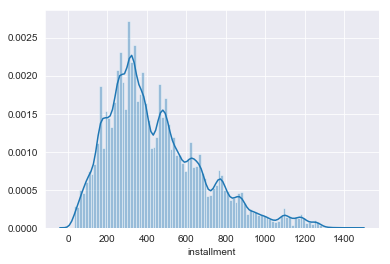

In [86]:
sns.distplot(df['installment'], bins=100)

#### Meanr Response

In [56]:
df = df[(df.loanstatus=='Fully Paid')|(df.loanstatus=='Charged Off')]

In [57]:
df.loanstatus.value_counts()

Fully Paid     304622
Charged Off     77094
Name: loanstatus, dtype: int64

In [58]:
df['loanstatus'] = np.where(df.loanstatus=='Charged Off',1,0)
df['loanstatus'].value_counts()
#or: df['loanstatus'] = df.loanstatus.map({'Fully Paid':0, 'Charged Off':1})

0    304622
1     77094
Name: loanstatus, dtype: int64

In [ ]:
df.to_csv('loan_2015_clean_update.csv', index=False)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110]),
 <a list of 111 Text xticklabel objects>)

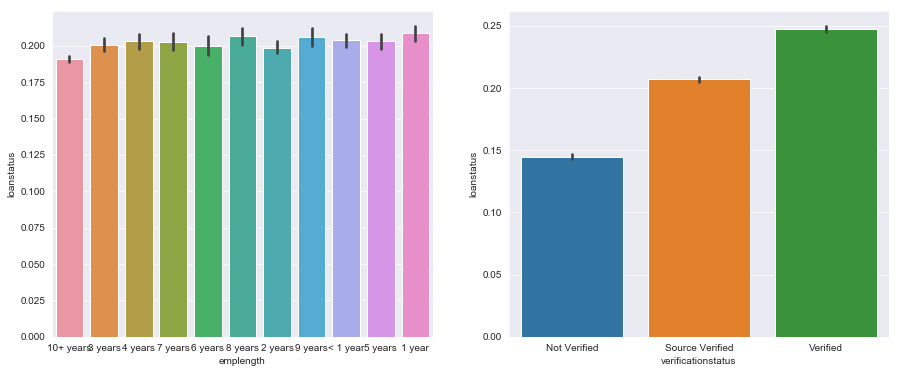

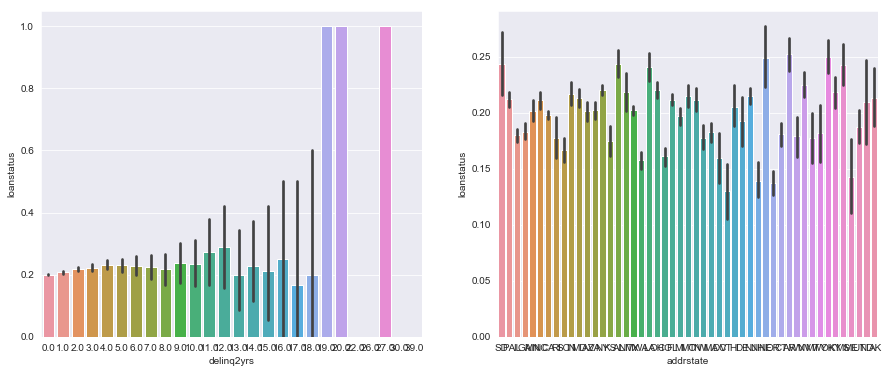

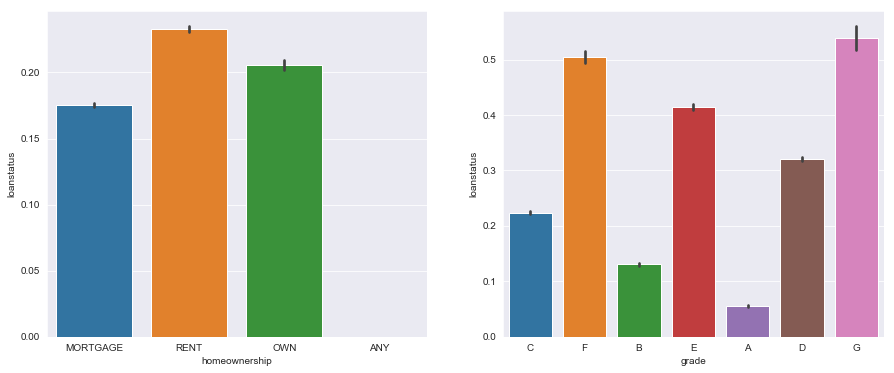

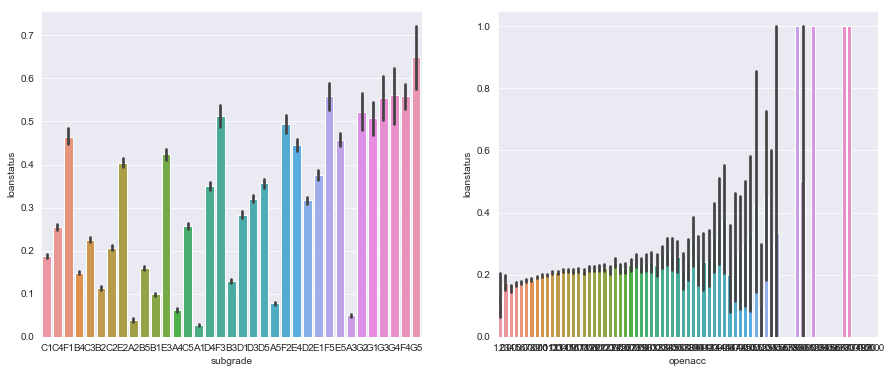

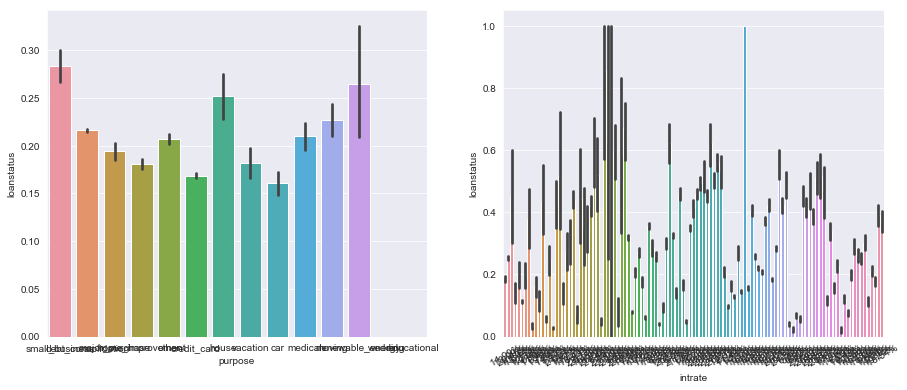

In [119]:
dummy_list = ["emplength", "verificationstatus", "delinq2yrs", "addrstate", 'homeownership', 
              "grade", "subgrade", "openacc", "purpose", "intrate"]
        
n_cols = 2
n_rows = 5

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(15,6))
    for j in range(n_cols):
        sns.barplot(x=dummy_list[i*n_cols+j], y='loanstatus', data=df, ax=ax[j])
plt.xticks(rotation=30)
 

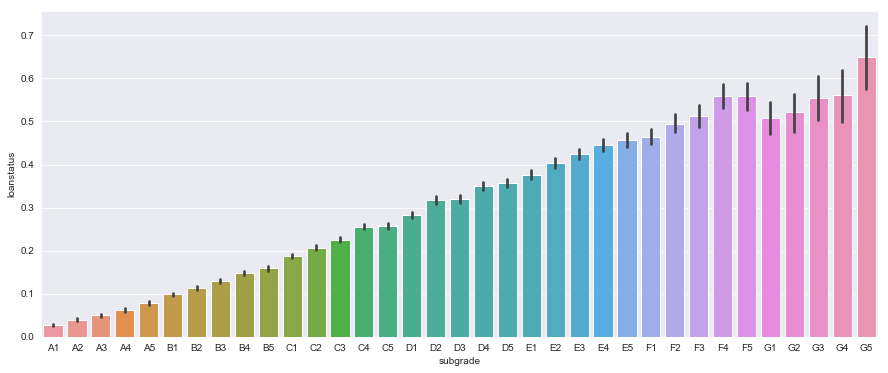

In [134]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x='subgrade', y='loanstatus', data=df, order=np.sort(df.subgrade.unique()))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]), <a list of 73 Text xticklabel objects>)

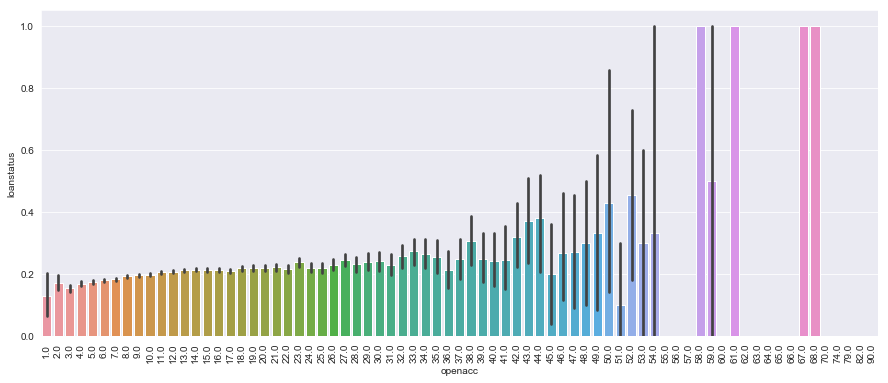

In [135]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x='openacc', y='loanstatus', data=df, order=np.sort(df.openacc.unique()))
plt.xticks(rotation=90)

## Explore num_feature 

In [ ]:
def countinuous_variable_plot(feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    factor = pd.qcut(df[feat_name], 5, labels = False) #groups the data act on groups                                                               #seperately
    table = df.groupby([factor, 'loanstatus']).size() #gets group size counts, hashed by the two variables
    table = table.unstack('loanstatus') #splits the data into 2 columns, 0, 1, each indexed by the
    normedtable = table.div(table.sum(1), axis=0) #divides the counts by the totals
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    normedtable.ix[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10", ax = ax )
    ax.set_xlabel("%s percentile" % feat_name , fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(x, labels, rotation='0', fontsize = 18)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat_name )
    fig.savefig('age.jpg')

In [23]:
df = pd.read_csv('loan_2015_clean_update.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
cols = df.columns.values

In [25]:
all_null_feature = []
num_feature = []
ob_feature = []
for col in cols:
    if df[col].isnull().sum() == df.shape[0]:
        all_null_feature.append(col)
    if df[col].dtype == 'object':
        ob_feature.append(col)
    else:
        num_feature.append(col)

print('all_null_feature:', len(all_null_feature), '\n', all_null_feature, '\n')
print('ob_feature:', len(ob_feature), '\n', ob_feature, '\n')
print('num_feature:', len(num_feature), '\n', num_feature)

all_null_feature: 0 
 [] 

ob_feature: 18 
 ['verificationstatusjoint', 'emplength', 'intrate', 'homeownership', 'subgrade', 'desc', 'applicationtype', 'verificationstatus', 'purpose', 'grade', 'earliestcrline', 'revolutil', 'addrstate', 'term', 'emptitle', 'initialliststatus', 'zipcode', 'issued'] 

num_feature: 75 
 ['totalilhighcreditlimit', 'allutil', 'numtl120dpd2m', 'mthssincerecentbc', 'id', 'inqlast12m', 'mortacc', 'numtl30dpd', 'openacc6m', 'pubrecbankruptcies', 'mthssincerecentinq', 'numrevaccts', 'numactvrevtl', 'dti', 'mthssincelastdelinq', 'mthssincelastmajorderog', 'openacc', 'delinqamnt', 'mthssincerecentbcdlq', 'pcttlnvrdlq', 'accopenpast24mths', 'annualincjoint', 'loanamnt', 'mosinrcnttl', 'openrv12m', 'accnowdelinq', 'totalbalil', 'mthssincercntil', 'collections12mthsexmed', 'avgcurbal', 'delinq2yrs', 'dtijoint', 'numoprevtl', 'annualinc', 'numrevtlbalgt0', 'mosinoldilacct', 'openil12m', 'mosinrcntrevtlop', 'taxliens', 'totalrevhilim', 'openactil', 'numacctsever120pd'

In [29]:
temp = {'loanstatus'}
num_feature_temp = list(set(num_feature)-temp)
print(len(num_feature_temp))
print(num_feature_temp)

74
['openil24m', 'ficorangehigh', 'dti', 'mthssincelastdelinq', 'mthssincerecentbcdlq', 'totcollamt', 'ficorangelow', 'pubrec', 'totalrevhilim', 'delinq2yrs', 'pubrecbankruptcies', 'totalcutl', 'openactil', 'loanamnt', 'percentbcgt75', 'mosinrcntrevtlop', 'mthssincelastmajorderog', 'totcurbal', 'totalbclimit', 'numtloppast12m', 'pcttlnvrdlq', 'collections12mthsexmed', 'openacc', 'openrv24m', 'openacc6m', 'mthssincercntil', 'mosinoldrevtlop', 'numrevtlbalgt0', 'numtl120dpd2m', 'inqlast12m', 'delinqamnt', 'numtl30dpd', 'numtl90gdpd24m', 'allutil', 'totalbalexmort', 'numiltl', 'chargeoffwithin12mths', 'numbctl', 'annualincjoint', 'openil12m', 'numsats', 'accnowdelinq', 'dtijoint', 'ilutil', 'mthssincerecentbc', 'mthssincelastrecord', 'mthssincerecentrevoldelinq', 'totalilhighcreditlimit', 'mortacc', 'taxliens', 'numrevaccts', 'bcutil', 'maxbalbc', 'totalacc', 'numactvrevtl', 'inqlast6mths', 'revolbal', 'mosinoldilacct', 'mosinrcnttl', 'numbcsats', 'openrv12m', 'installment', 'numoprevtl',

In [33]:
df['totcollamt'].value_counts()

0.0        320597
50.0          851
100.0         654
75.0          482
200.0         378
150.0         370
60.0          352
70.0          305
80.0          289
65.0          249
250.0         242
90.0          233
55.0          232
85.0          212
125.0         194
66.0          190
300.0         189
67.0          188
99.0          184
61.0          182
95.0          181
64.0          181
51.0          179
78.0          178
63.0          178
56.0          177
71.0          174
120.0         170
74.0          170
96.0          169
            ...  
3460.0          1
12372.0         1
6187.0          1
1432.0          1
24754.0         1
6189.0          1
3095.0          1
3832.0          1
12381.0         1
12351.0         1
24701.0         1
24700.0         1
12322.0         1
7036.0          1
3483.0          1
6157.0          1
1866.0          1
3462.0          1
6159.0          1
24642.0         1
14480.0         1
12341.0         1
6163.0          1
49313.0         1
24657.0   

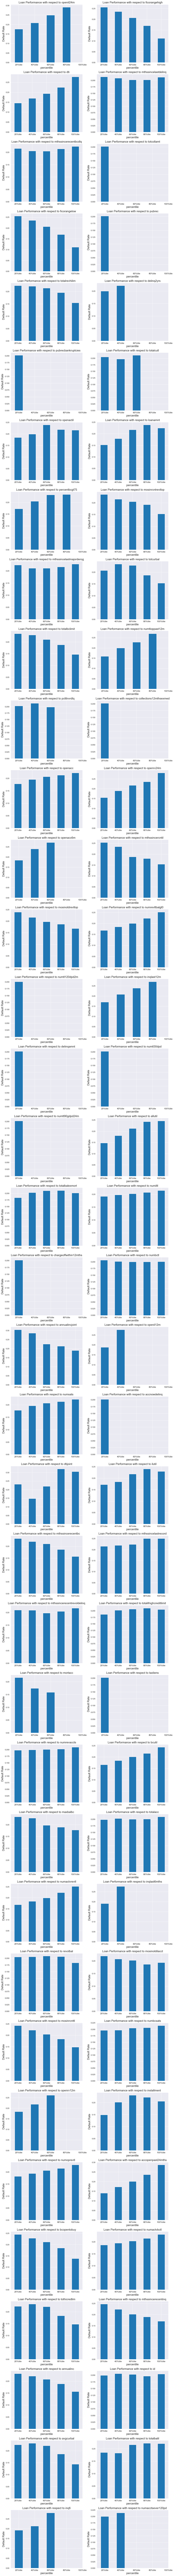

In [30]:
n_cols = 2
n_rows = 37

fig = plt.figure(figsize=(15,250))
for i, feat_name in enumerate(num_feature_temp):
    plt.subplot(n_rows, n_cols, i+1)
    feat_name = num_feature_temp[i]
    factor = pd.qcut(df[feat_name], 5, labels=False, duplicates='drop') #pd.qcut: order the column in ascending order, then cut into 5 setions
    table_new = df['loanstatus'].groupby(factor).mean() #group by 5 percentiles on 'loanstatus', then mean, get the default rate
    table_new.plot.bar()
    plt.title("Loan Performance with respect to %s" %(feat_name), fontsize=15)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(range(5), labels,rotation=0, fontsize=12)
    plt.xlabel('percentile', fontsize=15)
    plt.ylabel('Default Rate', fontsize=15)

#### Test 

In [137]:
fac = pd.qcut(df['annualinc'], 5, labels=False)
fac[:5]

0    2
2    1
3    4
4    2
5    0
Name: annualinc, dtype: int64

In [185]:
table_new = df['loanstatus'].groupby(fac).mean()
table_new

annualinc
0    0.231856
1    0.221654
2    0.208335
3    0.188945
4    0.156384
Name: loanstatus, dtype: float64

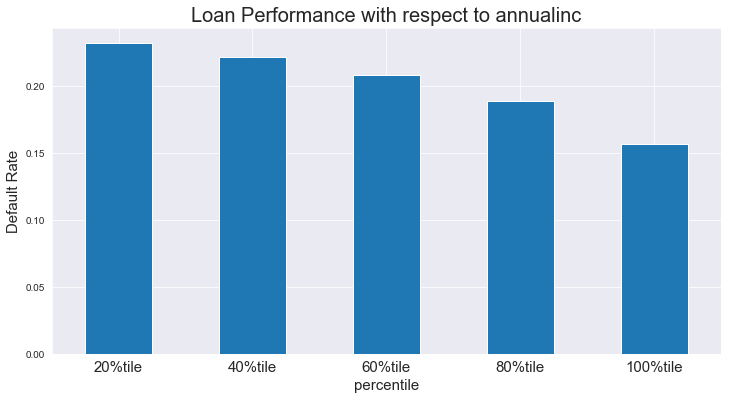

In [209]:
fig = plt.figure(figsize=(12,6))
table_new.plot.bar()
plt.title("Loan Performance with respect to annualinc", fontsize=20)
labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
plt.xticks(range(5), labels,rotation=0, fontsize=15)
plt.xlabel('percentile', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)


In [151]:
table = df.groupby([fac, 'loanstatus']).size()
table

annualinc  loanstatus
0          0             60486
           1             18257
1          0             57554
           1             16390
2          0             61069
           1             16071
3          0             65337
           1             15221
4          0             60176
           1             11155
dtype: int64

In [154]:
table = table.unstack('loanstatus')
table

loanstatus,0,1
annualinc,,
0,60486,18257
1,57554,16390
2,61069,16071
3,65337,15221
4,60176,11155


In [159]:
60486+57554+61069+65337+60176

304622

In [155]:
table.sum(1)

annualinc
0    78743
1    73944
2    77140
3    80558
4    71331
dtype: int64

In [156]:
normedtable = table.div(table.sum(1), axis=0)
normedtable

loanstatus,0,1
annualinc,,
0,0.768144,0.231856
1,0.778346,0.221654
2,0.791665,0.208335
3,0.811055,0.188945
4,0.843616,0.156384


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


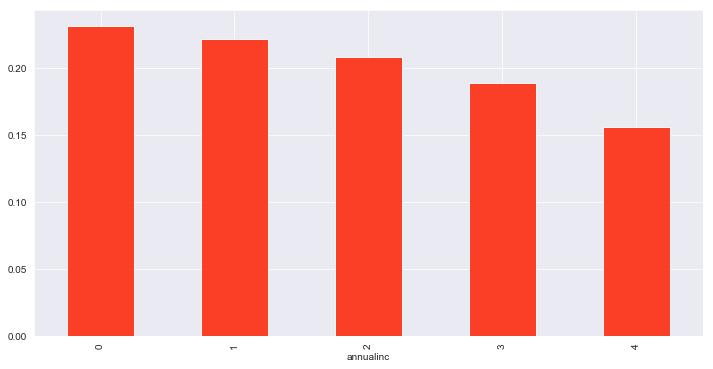

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
normedtable.ix[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10", ax = ax )